# Actividad: Clasificación de SPAM

¿Podemos clasificar un email como spam con árboles y/o ensambles?

Usaremos la base de datos [UCI Spam database](https://archive.ics.uci.edu/ml/datasets/Spambase)

Responda las preguntas y realice las actividades en cada uno de los bloques

Entregas al correo phuijse@inf.uach.cl hasta el Viernes 13, 11:20 AM

Se trabajará en grupos de dos personas: se entrega un notebook completo por grupo

# Import libraries

In [12]:
%matplotlib notebook
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree, metrics, ensemble
from sklearn.metrics import precision_recall_curve

In [3]:
# Descargar la base de datos con wget, si usas windows usa el link de arriba
!wget -c https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
!head -n 5 spambase.data

--2019-09-09 17:33:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data
Resolviendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando con archive.ics.uci.edu (archive.ics.uci.edu)[128.195.10.252]:443... conectado.
Petición HTTP enviada, esperando respuesta... 416 Requested Range Not Satisfiable

    El archivo ya se ha obtenido por completo; no hay nada que hacer.

0,0.64,0.64,0,0.32,0,0,0,0,0,0,0.64,0,0,0,0.32,0,1.29,1.93,0,0.96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.778,0,0,3.756,61,278,1
0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0,1.59,0,0.43,0.43,0,0,0,0,0,0,0,0,0,0,0,0,0.07,0,0,0,0,0,0,0,0,0,0,0,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0,1.16,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.06,0,0,0.12,0,0.06,0.06,0,0,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
0,0,0,0,0

Responda 
- ¿Cuántos atributos tiene la base de datos? Describalos de forma muy breve
-  Muestre un histograma de las etiquetas ¿Cuántos ejemplos hay de cada clase? ¿Es la base de datos balanceada?
- ¿Hay valores perdidos o invalidas? 

In [4]:
# get data
data = np.genfromtxt('spambase.data', delimiter=',')
X, Y = data[:, :-1], data[:, -1]

data.shape

(4601, 58)

Se tienen 58 atributos, en donde se tienen (descripción de dataset obtenida desde https://archive.ics.uci.edu/ml/datasets):

- 48 atributos que presentan la frecuencia de aparición de ciertas palabras (asociadas a spam, tales como gratis, internet) en cada email.
- 6 atributos que presentan la frecencia de aparición de ciertos caracteres (asociados a spam) en cada email.
- 3 atributos que presentan variables asociadas a la aparición de de caracteres en mayúscula de forma seguida en cada email (esto se asocia a spam).

Las etiquetas son:

- (1) spam
- (0) no spam

<IPython.core.display.Javascript object>


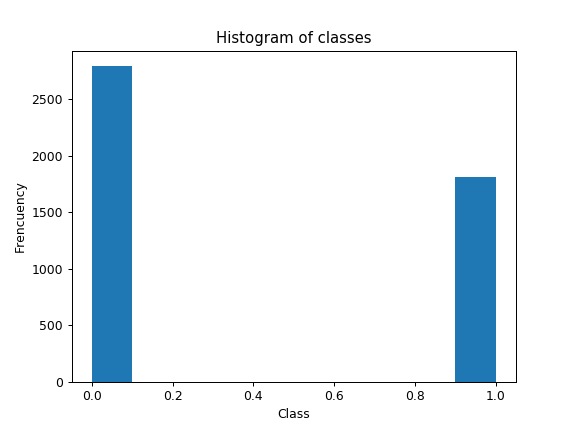

Text(0.5, 1.0, 'Histogram of classes')

In [5]:
# create plot
fig, ax = plt.subplots()

# add data to plot
ax.hist(Y)
ax.set_xlabel("Class")
ax.set_ylabel("Frencuency")
ax.set_title("Histogram of classes")

??? Se tienen clases desbalanceadas, ya que se tienen 1.000 (aproximadamente) mas instancias de la clase 0 (no spam) que la clase 1.

In [6]:
# Check if data has missing value
display(np.sum(np.isnan(data)))

0

Data no tiene missing values

## Data invalida??? no se que s

In [7]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.75, stratify = Y)

/home/leo/Escritorio/magister_uach/env/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Use el conjunto de entrenamiento para entrenar y ajustar los parámetros de un 
1. árbol de decisión
1. ensamble random forest 
1. ensamble *gradient boosting*

Puede usar `GridSearchCV` para encontrar los mejores estimadores

Para este caso particular y para cada estimador responda
- ¿Qué función/criterio funciona mejor? `criterion`
- ¿Qué profundidad de árbol funciona mejor? `max_depth`
- ¿Combiene ponderar las clases? `class_weight`
- En el caso de los ensambles 
    - ¿Es recomendable usar un subconjunto aleatorio de características? `max_features`
    - ¿Cuál es la mejor cantidad de clasificadores débiles? `n_estimators`

Compare los mejores modelos de cada tipo en el conjunto de test usando métricas de clasificación apropiadas

Analice y comente sus resultados

# Decision Tree

In [25]:
# Define model using gridsearch cross validation

# Define model
dt_model = tree.DecisionTreeClassifier(splitter = 'best')

# Parameters of model
# clas_weight: Add penalization to mistakes in minority class (unbalaced classes)
params = {
    "criterion": ("entropy", "gini"),
    "max_depth": np.linspace(1, 50, 10, dtype = int),
    "class_weight": [{0: .1, 1: 0.9}, {0: .2, 1: 0.8}]
}

# Define gridsearch cross validation
gscv_dt = GridSearchCV(dt_model, params, cv = 5)

# train model using grid of parameters
gscv_dt.fit(X_train, Y_train)

# Get best model
best_decision_tree = gscv_dt.best_estimator_

# Display best model
display(best_decision_tree)
print("Decision tree F1 score: ", metrics.accuracy_score(best_decision_tree.predict(X_test), Y_test))

DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, criterion='entropy',
            max_depth=39, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Decision tree F1 score:  0.9287576020851434


# Ensemble Random Forest

In [9]:
# Define model using gridsearch cross validation

# Define model
rf_model = ensemble.RandomForestClassifier(n_jobs=-1)

# Parameters of model
# clas_weight: Add penalization to mistakes in minority class (unbalaced classes)
params = {
    "criterion": ("entropy", "gini"),  
    "max_depth": np.linspace(1, 10, 2, dtype = int),
    "class_weight": [{0: .1, 1: 0.9}],
    "n_estimators": np.linspace(1, 100, 1, dtype = int),
    "max_features": ["sqrt", "log2"]
}

# Define gridsearch cross validation
gscv_rf = GridSearchCV(rf_model, params, cv = 5)

# train model using grid of parameters
gscv_rf.fit(X_train, Y_train)

# Get best model
best_random_forest = gscv_rf.best_estimator_

# Display best model
display(best_random_forest)
print("Decision tree F1 score: ", metrics.accuracy_score(best_random_forest.predict(X_test), Y_test))

RandomForestClassifier(bootstrap=True, class_weight={0: 0.1, 1: 0.9},
            criterion='gini', max_depth=10, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Decision tree F1 score:  0.838401390095569


# Gradient Boosting Ensemble

In [11]:
# Define model using gridsearch cross validation

# Define model
gb_model = ensemble.GradientBoostingClassifier(subsample=0.5, 
                                               learning_rate=0.1)

# Parameters of model
# clas_weight: Add penalization to mistakes in minority class (unbalaced classes)
params = {
    "criterion": ("friedman_mse", "mse"),  
    "max_depth": np.linspace(1, 10, 2, dtype = int),
    #"class_weight": [{0: .1, 1: 0.9}],
    "n_estimators": np.linspace(1, 100, 1, dtype = int),
    "max_features": ["sqrt", "log2"]
}

# Define gridsearch cross validation
gscv_gb = GridSearchCV(gb_model, params, cv = 5)

# train model using grid of parameters
gscv_gb.fit(X_train, Y_train)

# Get best model
best_gradient_boosting = gscv_gb.best_estimator_

# Display best model
display(best_gradient_boosting)
print("Decision tree F1 score: ", metrics.accuracy_score(best_gradient_boosting.predict(X_test), Y_test))

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Decision tree F1 score:  0.6055603822762815


# Evaluating and comparing models

<IPython.core.display.Javascript object>


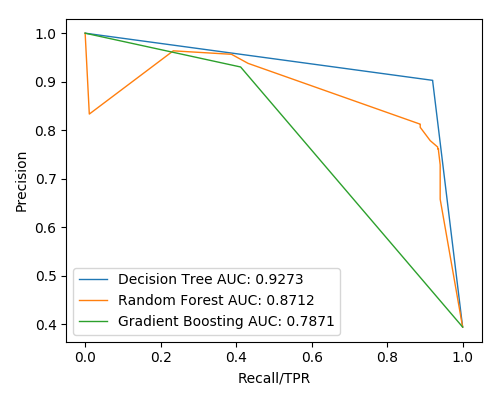

In [26]:
# Get plot
fig, ax = plt.subplots(1, figsize=(5, 4), tight_layout=True)
ax.set_xlabel('Recall/TPR')
ax.set_ylabel('Precision')

# get Gridsearch of each model
models_gscv = [gscv_dt, gscv_rf, gscv_gb]
names = ["Decision Tree", "Random Forest", "Gradient Boosting"]

# Iterate over each model
for name, gscv in zip(names, models_gscv):
    
    # get predictio of each best model
    Y_pred = gscv.best_estimator_.predict_proba(X_test)[:, 1]

    # Get get precision-recall for each model
    precision, recall, th = precision_recall_curve(Y_test, Y_pred)
    
    # create lable name
    label = name + ' AUC: ' + ("%.4f" %  metrics.auc(recall, precision))
    
    #plot recall precision curve
    ax.plot(recall, precision, label = label, linewidth=1)

# Add label
plt.legend(loc=3);